# **BUSI 488 / COMP 488 Data Science in the Business World**
## *Spring 2023*  
Daniel M. Ringel  
Kenan-Flagler Business School  
*The University of North Carolina at Chapel Hill*  
dmr@unc.edu

## Class 07 - Cluster Analysis
*January 31, 2023*  
Version 1.1


## Today's Agenda

1. Machine Learning
2. Concept of Distance and Similarity in Machine Learning
3. Cluster Analysis
4. k-Means Clustering
5. Customer Segmentation by k-Means
6. Community Detection
7. Visualization of Relationships

## Prep-Check:
 - Took Quiz 1 by Sunday (1/29) before midnight
 - Submitted final presentation of Team Assignment 1 by Friday (1/27) before midnight
 - DataCamp Homework 3 is due tonight.

# 1. **Machine Learning**

The ***ART*** and ***SCIENCE*** of:  
- Predictions from data 
- Giving computers the ability to learn to make decisions from data
- … without being explicitly programmed!

**Examples:**
- Learning to predict whether an email is spam or not
- Clustering wikipedia entries into different categories

**Types:**
- Supervised learning: Uses labeled data
- Unsupervised learning: Uses unlabeled data

![Overview Machine Learning](https://www.cognub.com/wp-content/uploads/2016/02/1.png)

*Source: COGNUB 2016*



## 1.1 Supervised vs. Unsupervised Learning: X's and Y's
- **Supervised learning** finds patterns for a prediction task using X's and Y's (features and response variables)
    * For example, predict if a customer is at risk of churning (at risk vs. not at risk)
- **Unsupervised learning** finds patterns in data based on only the X's (i.e., features)
    * Has no specific prediction task in mind
    * Often used for discovery


##### **Hint:** Many Names, same thing:

- Features = predictor variables = independent variables = X's
- Target variable = dependent variable = response variable = labels = Y

##### **Important Concept:** We can think of all features (i.e., columns) of an observation (i.e., row) as a ***feature vector*** (of that observation). 
- At this point in the course, these features are structured data that are directly interpretable.   
- Later in this course, we will work with ***latent feature vectors*** where features are encoded (or embedded) in vectors. These latent features are not directly intepretable, but are very useful in dimensionality reduction, natural language processing, and AI applications in general. 
- You can think of a ***latent feature vector*** as a row (i.e., an observation) with many columns that contain numbers. The meaning of those numbers is, however, not immediately apparent. Yet, there is information embedded in these latent feature vectors that can be of interest/value to us.

## 1.2 Today's Class: Unsupervised Learning
> *Unsupervised learning is a type of machine learning that looks for previously undetected patterns in a data set with no pre-existing labels and with a minimum of human supervision. In contrast to supervised learning that usually makes use of human-labeled data, unsupervised learning, also known as self-organization allows for modeling of probability densities over inputs.*

*Hinton, G.E., Sejnowski, T.J. and Poggio, T.A. eds., 1999. Unsupervised learning: foundations of neural computation. MIT press.*

### *Unsupervised learning finds patterns in data*
- **Clustering** customers by their purchases
- **Dimensionality Reduction** "compresses" data such as purchases patterns




# 2 Distance and Similarity

Unsupervised learning largely operates on measures of distance or similarity between feature vectors (e.g. firms, consumers, products, etc.).
- Distance metrics: $d(A,B)\ge 0$  with equality iff $A=B$.  Triangle inequality:  $d(A,B) \le d(A,C) + d(C,B)$ for any $C$. 
- Similarity measures: $s(A,B) \in [0,1]$; when $A=B$, $s(A,B)=1$. 

### Some Applications for Distances and Similarities
- Identify similar and different firms to diversify an investment portfolio 
- cluster customers by their behaviors or needs to Segment a market and optimize your marketing strategy
- Recommend products or services, e.g., "People who liked product A also liked product B"
- Find similar legal cases and verdicts that lawyers may use to build their line of argument upon 

## 2.1 Euclidean Distance

- Most widely used distance metric
- Intuitive geometric interpretation
- Easy to calculate: Pythagorean theorem, which extends to many dimensions
    - Sums squares of distances between features
    - Also called $L_2$ norm, represented by $
\left \| \cdot  \right \|_2$
- Can easily be transformed to similarity

![Euclidean](https://mapxp.app/BUSI488/Euclidean2.jpg "Euclidean Distance")  

*Source: Provost, F. and Fawcett, T., 2013. Data Science for Business: What you need to know about data mining and data-analytic thinking. " O'Reilly Media, Inc.".*  
  

#### Formally:
$d_{Euclidean}\left ( \mathbf{A,B }\right )= \left \| \mathbf{A}-\mathbf{B} \right \|_2 = \sqrt{\left ( A_1 - B_1 \right )^2 + \left ( A_2 - B_2 \right )^2 + ... + \left ( A_N - B_N \right )^2}$

#### Example:  

| Attribute                        | Customer A | Customer B |Customer C|
|----------------------------------|------------|------------|------------|
| Age                              | 23         | 42         |45|
| Tenure                           | 3          | 7          |7|
| Subsidiary:  <br>1=ATL, 2=CHI, 3=BOS | 2          | 1          |1|
| FICO Score                       | 710        | 790        |640 | 

The Euclidean distance between Customer A and Customer B is:

$d_{Euclidean}\left ( \mathbf{A,B }\right )=\left \| \mathbf{A}-\mathbf{B} \right \|_2 = \sqrt{\left ( 23-42 \right )^2 + \left ( 3-7 \right )^2 + \left ( 2-1 \right )^2 + \left ( 710-790 \right )^2 } = 82.32$   

**Note** that Euclidean Distance can easily be transformed to Similarity of range 0 to 1:  

$Similarity= \frac{max\left ( D \right )-d}{max(D) - min(D)}$   

####***BEWARE***:  
Three potential pitfalls of using Euclidean Distance (or Similarity) to compare customers A,B as above:
1. Feature Scales
2. Nominal Variables
3. Interpretation  

####**Can you identify each of these three in the above example?**  

*Not all of these problems may affect your analysis and not all of them can be fully mitigated*


In [ ]:
# We can easily generate a distance matrix from vectors using Python
# many clustering and visualization algorithms operate on distance matrices

# 1. Import relevant packages
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import minmax_scale

# 2. Create some Customers

# Create List of Lists for Data, and a List for Index (Customer)
data = [[23,3,2,710], [42,7,1,790], [45,7,1,640]]
names = ['Bellamy', 'Charlie', 'Ash']  

# Create the pandas DataFrame
Customers = pd.DataFrame(data, columns = ['Age', 'Tenure', 'Subsidiary', 'FICO'], index = names)
  
# Show Customers DataFrame
Customers

,Age,Tenure,Subsidiary,FICO
Bellamy,23,3,2,710
Charlie,42,7,1,790
Ash,45,7,1,640


In [ ]:
# 3. We now need to make sure that our features are all on the same scale
# mix-max scale the data between 0 and 1
Customers_scaled = minmax_scale(Customers)
print(Customers_scaled)

[[0.         0.         1.         0.46666667]
 [0.86363636 1.         0.         1.        ]
 [1.         1.         0.         0.        ]]


In [ ]:
# 4. Create a Distance Matrix from Rescaled Customer Vectors
distances = pairwise_distances(Customers_scaled, metric="euclidean")
print(distances)

[[0.         1.7407792  1.79381654]
 [1.7407792  0.         1.0092547 ]
 [1.79381654 1.0092547  0.        ]]


In [ ]:
# 5. Convert Distances to Similarities

# find min and max distances
d_min=distances.min()
d_max=distances.max()

# Define a function to convert distances to similarities between 0 and 1
def f(x,d_min,d_max): 
   return ((d_max-x)/(d_max-d_min)) 

# Apply function to all elements
f(distances,d_min,d_max)

array([[1.        , 0.02956676, 0.        ],
       [0.02956676, 1.        , 0.43737017],
       [0.        , 0.43737017, 1.        ]])

## 2.2 Cosine Similarity

- Widely used in text and image analysis
- Ignores overall magnitudes to focus on relative magnitudes of features
- Measures similarity between two non-zero feature vectors as the cosine of the angle between them
    * two vectors with the same direction have a cosine similarity of 1
    * two vectors oriented at 90° relative to each other have a cosine similarity of 0
    * two vectors diametrically opposed have a cosine similarity of -1
- Especially easy to calculate for unit vectors (pre-normalized so $\|A\|_2=1$)
![Cosine Similarity](https://mapxp.app/BUSI488/cosine2.png)
 *Source: DataCamp*

#### Formally:

$s_{cosine}\left ( \mathbf{A,B} \right )= \frac{\mathbf{A\cdot B}}{\left \| \mathbf{A} \right \|_2\cdot \left \| \mathbf{B} \right \|_2}$  

where $\left \| \cdot  \right \|_2$ represents the L2 norm, or Euclidean length, of each feature vector. For a vector, this is simply the distance from the origin.

#### Example:  

| Attribute                        | Customer A | Customer B |Customer C|
|----------------------------------|------------|------------|------------|
| Age                              | 23         | 42         |45|
| Tenure                           | 3          | 7          |7|
| Subsidiary:  <br>1=ATL, 2=CHI, 3=BOS | 2          | 1          |1|
| FICO Score                       | 710        | 790        |640 | 


The cosine similarity between Customer A and Customer B is:


$s_{cosine}\left ( {A,B} \right )= \frac{\left \langle 23, 3, 2, 710 \right \rangle\cdot \left \langle  42, 7, 1, 790\right \rangle}{\left \| \left \langle 23, 3, 2, 710 \right \rangle\right \|_2\cdot \left \| \left \langle  42, 7, 1, 790\right \rangle \right \|_2}=\frac{23\cdot 42+3\cdot 7+2\cdot 1+710\cdot 790}{\sqrt{529+9+4+504,100}\cdot\sqrt{1,764+49+1+624,100}}=\frac{561,889}{562,016}=0.9997$


**Note:**  *cosine distance* is simply 1 - *cosine similarity*.  Thus, *cosine similarity* = 1 - *cosine distance*, too. 

#### ***BEWARE***:   
Three potential pitfalls of using Cosine Similarity (or Distance) to compare customers A,B as above:
1. Feature Scales
2. Nominal variables
3. Interpretation  

#### **Can you identify them in the above example?**  

*Not all of these problems may affect your analysis and not all of them can be fully mitigated*


In [ ]:
# 1. Let's create a cosine similarity matrix from our scaled customer data
cosine_similarity = 1- pairwise_distances(Customers_scaled, metric="cosine")
print(cosine_similarity)

[[1.         0.25520134 0.        ]
 [0.25520134 1.         0.79525493]
 [0.         0.79525493 1.        ]]


# 3 Cluster Analysis

***Clustering is a common unsupervised learning task.***

**Clustering** is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).  
*Source: Wikipedia.org*. 


#### Basic Idea: use features (only X's) to divide data into groups
 - Homogeneous within groups
 - Heterogeneous between groups
 
    
#### Examples:
- Customer segmentation
- Image segmentation
- Anomaly detection
- Ensuring diversity in data sampling

![Clustering](https://mapxp.app/BUSI488/clustering.png)

#### Things to keep in mind when clustering data:
1. Always cluster data in regard to a **specific objective**.    
   Depending on your objective, you might use different features to cluster your data,
   and interpret the outcomes differently.  
   

2. Make sure that your clusters are substantial enough (i.e., large enough) to make them:
    - *Meaningful*: Relevant in the context of the objectives
    - *Actionable:* Useful for your purpose
    
    
3. There are many different clustering algorithms available today
   - Each has unique strengths and weaknesses
   - There is no single best algorithm
   - The most appropriate clustering algorithm for a particular problem often needs to be chosen experimentally, 
     unless there is a mathematical reason to prefer one clustering algorithm over another. 
   - A single clustering algorithm might work well on a particular dataset but fail for a different kind of dataset.

# 4 k-Means Clustering

- k-Means clustering is the most frequently used form of clustering due to its speed and simplicity
    - It is closely related to k-NN which we previously saw in supervised learning
    - A cluster is a group of data points (e.g., observations, records, cases, objects, etc.)  with similar features
- k-Means clustering is an unsupervised learning algorithm with
    - **Input:** feature vectors (aka points) for a dataset and a ***fixed number (k) of clusters*** to find
    - **Output:** k **centroid** points that define clusters: each data point is in the cluster of the nearest centroid.  
    Each centroid is the average of the data points in its cluster.

## 4.1 The k-Means Clustering Process

k-Means starts by randomly picking k centroids. 
From there, it works in iterative (repetitive) steps to perform two tasks:

1. Assign each data point to the cluster of the closest centroid, using the standard Euclidean distance  
   *In layman’s terms:* As the crow flies: The straight-line distance between the data point and the centroid   
   
   
2. For each cluster, calculate a new centroid position as the mean of the values of all points in the cluster  
   

These two steps are repeated until:
- there is no change in the centroid values, meaning that the clusters have stabilized, 
- *or* a previously determined maximum number of steps has been reached


## 4.2 Numerical Example of k-Means

A retailer wants to know what is important to its customers. The retailer surveys 5 customers and asks them to rate the importance of Service, Variety and Price on a scale of 1 (low importance) to 10 (high importance). Are there any segments among the respondents? 

![k-means example](https://www.mapxp.app/BUSI488/kmeans1a.jpg)   

#### We start by randomly initializing our centroids. We assume k=2.

![k-means example](https://www.mapxp.app//BUSI488/kmeans2a.jpg)   

#### Now we calculate the mean attribute importance for each centroid (right side of table below) based on the respondents associated with them in the table above.

![k-means example](https://www.mapxp.app//BUSI488/kmeans3a.jpg)   

#### Next, we calculate the Euclidean Distance for each respondent to each centroid (right side of table above). 
For Chris the distances would be as follows:  

$d_{Chris , C1}= \sqrt{\left ( 6.33-3 \right )^2 + \left ( 6.33-4 \right )^2 + \left ( 7.33-6 \right )^2} = 4.28$   

$d_{Chris , C2}= \sqrt{\left ( 5.5-3 \right )^2 + \left ( 2-4 \right )^2 + \left ( 8-6 \right )^2} = 3.77$   

#### Now we can determine which centroid each respondent in this iteration should actually belong (the one that the respondent is closest to) to and switch memberships accordingly.

![k-means example](https://www.mapxp.app//BUSI488/kmeans4a.jpg)   

#### We repeat the process until there is no more change in centroid values (i.e., nobody is switched) or a fixed number of iterations has been reached.



# 5. **Dr. D's Amazin' Grocery Store**

It has been few years since Dr. D. launched his Amazin’ Bookstore. Thanks to the great data science talent he recruited from UNC, Dr. D’s bookstore is a huge success. Therefore, Dr. D. decided to expand into groceries. He launched his Amazin’ Grocery Store and immediately started to collect data on his customers (using a loyalty program where they only need to supply their phone number at check-out). He was also able to segment his existing customer base, which enables him to target them much more effectively with promotions that they might be interested in (using the appropriate medium).

The segmentation of his customers is a manual process at this time. Dr. D. has to hire experts from a renown consulting firm (Accidenture) every couple of years for USD 3500 per consultant per day plus travel expenses. Usually the team of 2 consultants finishes their work within a week of surveying customers at the store and analyzing the data. 

Clearly, Dr. D. would rather go on a (very!) nice vacation than pay that much money to Accidenture for the segmentation of his customers. He therefore decided that he should use the power of data science and AI to automatically segment his customers. 

He put YOU in charge of the task and provided you with a dataset of customer records. The dataset contains the following information:

- CustomerID
- Name of Customer
- Nickname of Customer
- Average monthly spending in USD (i.e., revenue)
- Average number of shopping trips to his grocery store
- Average basket size per shopping trip (i.e., number of SKUs purchased on a trip)
- The share of private label products bought by the customer
- The share of organic products bought by the customer
- Whether a customer actively uses the store’s own credit card or not
- The segment each customer was assigned to by Accidenture 

**Let's see if we can save Dr. D. thousands of dollars by segmenting his customers using unsupervised learning!**

## 5.1 Load and Inspect Customer Data

In [ ]:
# 0. Connect your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/488/Class07
!ls # special shell command to view the files in the home directory of the notebook environment

Mounted at /content/gdrive
/content/gdrive/MyDrive/488/Class07
488_2023_Class07.ipynb	DrDsAmazinGroceryStore1.csv


In [ ]:
# 1. Import Pandas
import pandas as pd

# 2. Define filename (assuming you are already in the right path)
customers_file = "DrDsAmazinGroceryStore1.csv"

# 3. Read customer data into a Pandas DataFrame
customers_df = pd.read_csv(customers_file) # parse to a Pandas DataFrame using pd.read_csv()

# 4. Take a look at the first 5 customers
customers_df.head()


,CustomerID,CustomerName,CustomerNick,Spending,Basket,Trips,PLabel,Organic,Segment,StoreCC
0,1128333,"Cole, Pearl",.,297.48,9.3,5.2,2.9,37.7,Yuppies,0
1,1174706,"Brooks, Lucy",Lulu,324.38,8.0,14.6,19.1,21.7,Seniors,0
2,1221082,"Hamilton, Luke",.,379.40,8.6,14.0,19.5,28.9,Seniors,1
3,1267459,"Ringel, Daniel",.,425.18,9.0,15.1,32.2,34.9,Families,1
4,1313836,"Griffiths, Christina",Christa,305.18,11.5,4.3,3.0,31.6,Yuppies,0


In [ ]:
# 5. Let's get the features that we can cluster the data on
import numpy as np
X = customers_df.drop(['CustomerID', 'CustomerName', 'CustomerNick','Segment'], axis=1).values
display("Feature Variables: ",X.shape)

# 6. We now need to make sure that our features are all on the same scale
from sklearn.preprocessing import minmax_scale
# mix-max scale the data between 0 and 1
X_scaled = minmax_scale(X)

'Feature Variables: '

(144, 6)

In [ ]:
# 6. Let's look at the first three rows:
X_scaled[0:3,0:5]

array([[0.31911759, 0.18857143, 0.12849162, 0.04054054, 0.73066667],
       [0.42073056, 0.11428571, 0.65363128, 0.47837838, 0.304     ],
       [0.62856495, 0.14857143, 0.62011173, 0.48918919, 0.496     ]])

In [ ]:
# 7. What about Accidenture's segments? What are they?
customers_df.Segment.value_counts()

Families    52
Seniors     49
Yuppies     43
Name: Segment, dtype: int64

## 5.2 Segment Dr. D's Amazin' Grocery Store Customers with k-Means

Let's use Dr. D's data from his Amazin' Grocery Store and see what segments we would identify if the consulting firm had not done it - but purely based on clustering the customers' features.

#### Let's cluster our data with k-Means

In [ ]:
# 1. Import required packages
import numpy as np
from sklearn.cluster import KMeans

# 2. Instantiate kMeans model
kmeans = KMeans(n_clusters=3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)

# 3. Fit kMeans model with re-scaled data
kmeans = kmeans.fit(X_scaled)

# 4. Use fitted kMeans model to predict cluster memberships (labels)
labels = kmeans.predict(X_scaled) 
print(labels)

[2 0 1 1 2 1 1 0 2 1 1 1 1 1 1 2 2 1 2 1 2 1 2 1 1 2 1 1 0 0 1 1 0 2 0 1 1
 2 2 1 2 0 1 2 2 1 2 2 1 0 2 1 1 1 1 1 2 1 1 2 2 1 0 1 1 1 2 0 1 0 2 1 0 1
 0 0 2 1 0 1 0 0 1 0 1 2 1 2 1 0 2 0 1 2 1 1 2 1 1 1 1 1 0 0 1 1 1 1 0 1 1
 1 2 1 1 1 2 2 0 2 0 1 2 0 2 2 2 1 1 1 1 2 0 1 2 1 1 2 2 1 1 2 0 2]


In [ ]:
# 5. Add clusters to Customer DataFrame
customers_df['Label'] = labels+1
customers_df.head()

,CustomerID,CustomerName,CustomerNick,Spending,Basket,Trips,PLabel,Organic,Segment,StoreCC,Label
0,1128333,"Cole, Pearl",.,297.48,9.3,5.2,2.9,37.7,Yuppies,0,3
1,1174706,"Brooks, Lucy",Lulu,324.38,8.0,14.6,19.1,21.7,Seniors,0,1
2,1221082,"Hamilton, Luke",.,379.40,8.6,14.0,19.5,28.9,Seniors,1,2
3,1267459,"Ringel, Daniel",.,425.18,9.0,15.1,32.2,34.9,Families,1,2
4,1313836,"Griffiths, Christina",Christa,305.18,11.5,4.3,3.0,31.6,Yuppies,0,3


In [ ]:
# 6. Get the cluster centers in terms of all 6 input dimensions
Centers = kmeans.cluster_centers_
print(Centers)

[[ 3.75990902e-01  1.80408163e-01  4.16600160e-01  4.56081081e-01
   3.57238095e-01 -3.33066907e-16]
 [ 6.71313600e-01  2.34129159e-01  6.75135838e-01  7.08996668e-01
   2.51141553e-01  1.00000000e+00]
 [ 3.04300389e-01  2.35747508e-01  7.44445888e-02  6.32935261e-02
   6.01116279e-01  2.32558140e-02]]


## 5.3 Let's Visualize the results in a 3D Scatter Plot!

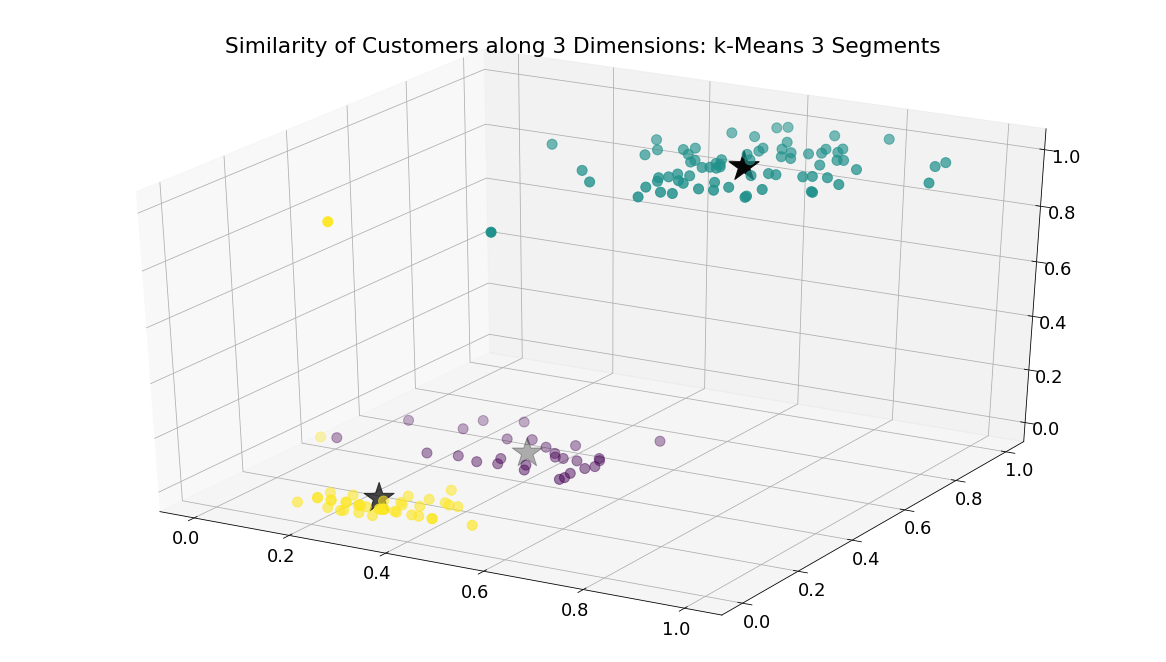

In [ ]:
# 1. Import required packages
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 2. Set-up 3D Plot
plt.rcParams['font.size'] = 18  # makes label size bigger
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
plt.title('Similarity of Customers along 3 Dimensions: k-Means 3 Segments')

# 3. Plot Customers along re-scaled features
ax.scatter(X_scaled[:, 0], X_scaled[:, 3], X_scaled[:, 5], c=customers_df.Label, s=100)

# 4. Overlay Cluster Centers of k-Means along re-scaled features
ax.scatter(Centers[:, 0], Centers[:, 3], Centers[:, 5], marker='*', c='#050505', s=1000)

## 5.4 How do our Segments compare to those of Accidenture?


In [ ]:
# 1. Check out data
display(customers_df.info())

# 2. Typecast Segment to be categorical 
customers_df.Segment = customers_df.Segment.astype('category').cat.codes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerID    144 non-null    int64  
 1   CustomerName  144 non-null    object 
 2   CustomerNick  144 non-null    object 
 3   Spending      144 non-null    float64
 4   Basket        144 non-null    float64
 5   Trips         144 non-null    float64
 6   PLabel        144 non-null    float64
 7   Organic       144 non-null    float64
 8   Segment       144 non-null    object 
 9   StoreCC       144 non-null    int64  
 10  Label         144 non-null    int32  
dtypes: float64(5), int32(1), int64(2), object(3)
memory usage: 11.9+ KB


None

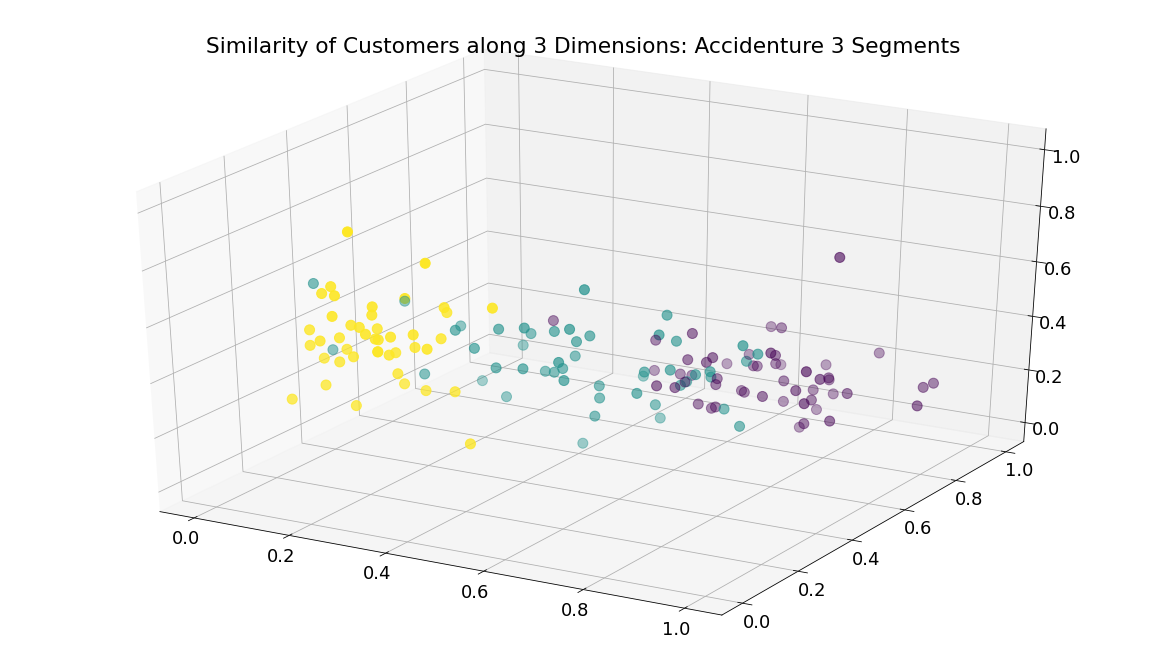

In [ ]:
# 3. Set-up 3D Plot
plt.rcParams['font.size'] = 18  # makes label size bigger
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
plt.title('Similarity of Customers along 3 Dimensions: Accidenture 3 Segments')

# 4. Plot Customers along re-scaled features
ax.scatter(X_scaled[:, 0], X_scaled[:, 3], X_scaled[:, 4], c=customers_df.Segment, s=100)

## 5.5 Finding "k"

So what is the right number for k in k-Means? Well... there is no single answer to this question!

- To find the best k we need to measure the quality of the clusters
- We use Within Cluster Sum of Squares (WCSS)
- WCSS is the sum of the squared distance between each member of the cluster and its centroid

- Common heuristic is called "Elbow Method"
    - start with k = 1
    - create centroids, and run k-Means
    - sum the squared distances between each point and its closest centroid (i.e., squared sum of errors)
    - increase in clusters corresponds to smaller groupings and distances
        - squared sum of errors will always decrease when k increases
        - if we choose k equal to the number of data points, then sum of squared errors is zero
    - repeat for many k values (e.g., 1, 2, ..., 10)  
    

- **Objective**: Find the point at which: 
    - increasing k will lead to a very small decrease in the error sum
    - while decreasing k will sharply increase the error sum. 
  
  This ***sweet spot*** is called the “elbow point.”  


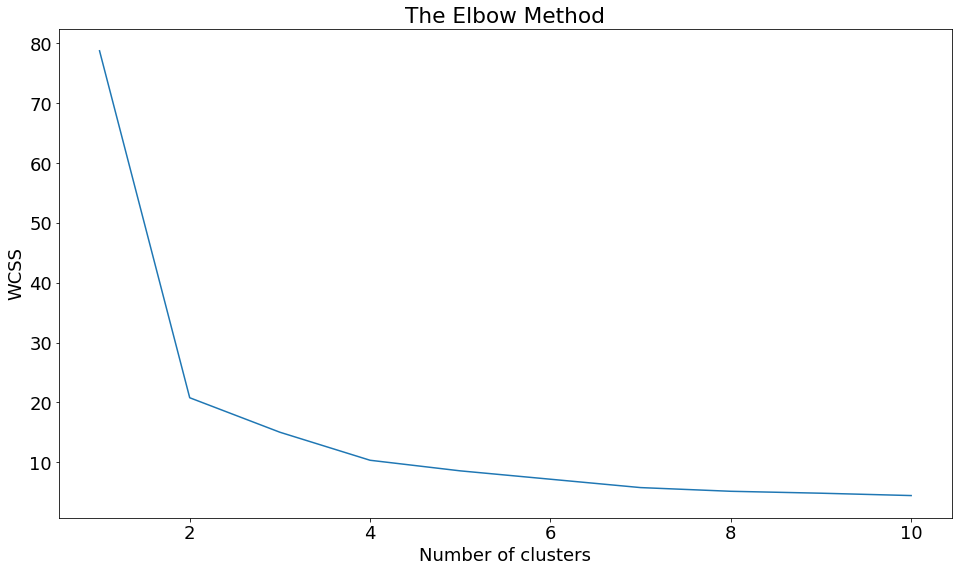

In [ ]:
# 1. Import required packages
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 2. Create an empty list to hold Within Cluster Sum of Squares (WCSS)
wcss = [] 

# 3. Run k-means multiple times (here 11) with k = 1 to 11 and record WCSS (using .inertia_)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
# 4. Plot WCSS against k in a line graph and look for 'The Elbow'
plt.rcParams['figure.figsize'] = (16, 9)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

### 5.5.1 Re-Cluster with "correct" value for k

In [ ]:
# 1. Instantiate kMeans model
kmeans = KMeans(n_clusters=4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)

# 2. Fit kMeans model with re-scaled data
kmeans = kmeans.fit(X_scaled)

# 3. Use fitted kMeans model to predict cluster memberships (labels)
labels = kmeans.predict(X_scaled) 

# 4. Add clusters to Customer DataFrame
customers_df['Label2'] = labels+1
customers_df.head()

,CustomerID,CustomerName,CustomerNick,Spending,Basket,Trips,PLabel,Organic,Segment,StoreCC,Label,Label2
0,1128333,"Cole, Pearl",.,297.48,9.3,5.2,2.9,37.7,2,0,3,2
1,1174706,"Brooks, Lucy",Lulu,324.38,8.0,14.6,19.1,21.7,1,0,1,3
2,1221082,"Hamilton, Luke",.,379.40,8.6,14.0,19.5,28.9,1,1,2,1
3,1267459,"Ringel, Daniel",.,425.18,9.0,15.1,32.2,34.9,0,1,2,1
4,1313836,"Griffiths, Christina",Christa,305.18,11.5,4.3,3.0,31.6,2,0,3,2


### 5.5.2 Visualize again

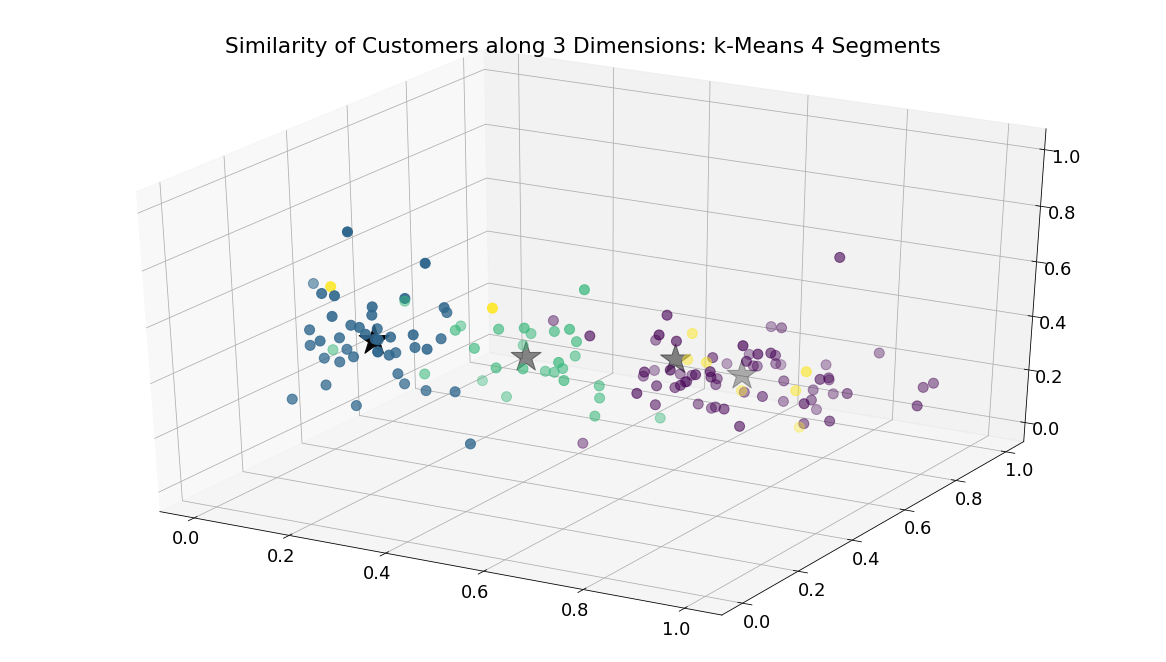

In [ ]:
# 1. Set-up 3D Plot
plt.rcParams['font.size'] = 18  # makes label size bigger
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
plt.title('Similarity of Customers along 3 Dimensions: k-Means 4 Segments')

# 2. Plot Customers along re-scaled features
ax.scatter(X_scaled[:, 0], X_scaled[:, 3], X_scaled[:, 4], c=customers_df.Label2, s=100)

# 3. Overlay Cluster Centers of k-Means along re-scaled features
Centers = kmeans.cluster_centers_
ax.scatter(Centers[:, 0], Centers[:, 3], Centers[:, 4], marker='*', c='#050505', s=1000)
plt.show()

## 5.6 Advantages and Disadvantages of k-Means

**Advantages of k-Means:**

   * Widely used method for cluster analysis
   * Easy to understand
   * Trains quickly

**Disadvantages of k-Means:**

   * Euclidean distance is not ideal in many applications
   * Performance is (generally) not competitive with the best clustering methods
   * Small variations in the data can result in a completely different clusters (high variance)
   * Clusters are assumed to have a spherical shape and be evenly sized

**Other clustering methods in sklearn:** https://scikit-learn.org/stable/modules/clustering.html 


# 6. **Community Detection**


- Another approach to cluster objects
- Rooted in social network analysis (SNA)
- Also commonly used in biology and physics
- Based on relationships of objects
    - can be interactions of people
    - communication
    - connections on social media
    - or similarities  
    
**Some Vocabulary**
- A network is a system of relationships (can be captured by a matrix or a graph)
- Objects are called *nodes*
- Relationships among objects are called *edges*
- Edges can be weighted (counts, probabilities, etc.) or unweighted (yes/no = 1 or 0)
- Edges can be directional (often called arcs) or undirectional  
- Objects in a community are called *members*
    
#### Community Definition    

- Members should be connected
- Few edges between communities
- Dense inside, few edges outside

#### Hierarchies in Networks
    
Community detection uncovers hierarchies of communities in large networks:
- Intermediate levels of organization of complex systems

![communities](https://www.mapxp.app/BUSI488/communities.jpg) 

*Source: Martin Rosvall and Carl T. Bergstrom, PNAS 105, 1118 –1123 (2008)*

#### How to detect Communities?

**Number of methods:**
- Girvan-Newman
- Louvain
- Spectral Clustering
- Trawling

**Agglomerative vs. Divisive**

*All optimize some function related to the community definition in order to find a solution*

## 6.1 Louvain Community Detection
- Popular community detection algorithm
- Operates on a similarity matrix (or an adjacency matrix)
- Greedy algorithm optimizes "modularity," which measures density.

**Main idea:** Hierarchical decomposition of the network  
**Procedure:** Multi-scale optimization - local search first among neighbors, then among neighboring communities, etc.  

***Very fast! Only limitation is storage of network in memory***

## 6.2 Modularity

Modularity measures the quality of an assignment of nodes to communities by comparing how much more densely connected the nodes within a community are to how connected they would be, on average, in a random network.

#### ***How to find the optimal number of communities using Modularity?***

Communities are groups of nodes within a network that are more densely connected to one another than to other nodes.

**Idea:** Define a probabilistic model and evaluate the likelihood of observing a certain set of communities compared to some null model.  

**Null model:** Edges are equally likely between any pair of nodes, regardless of community structure (“Erdos-Renyi random model”).   

**Determine:** How much does a proposed set of communities deviate from this null model? 

##### Note the difference from the way our clustering algorithms determine the number of clusters:
- k-means (defines k, the number of clusters, a priori) 
- hierarchical WARD clustering (identifies, a posteriori, the number of clusters using e.g. elbow criterion) 

**Formal Definition of Modularity:**  
![modularity](https://www.mapxp.app/BUSI488/modularity.jpg)

## 6.3 Louvain Community Detection Process

1. Loop over the nodes: each node is put in the community of its neighbors that yields the largest increase of modularity

2. Communities are replaced by “supernodes”, edges between supernodes are weighted by the number of simple edges between them (= coarsening of the network) 

3. Repeat from step 1 for weighted network of step 2

4. Modularity is always computed with respect to the original network; when it cannot increase any more, the process stops

![louvain](https://www.mapxp.app/BUSI488/louvain.jpg) 


*Source:* *Vincent, D.B., Jean-Loup, G., Renaud, L., and Etienne, L., "Fast Unfolding of Communities in Large Networks",  Journal of Statistical Mechanics: Theory and Experiment, 2008(10),  pp. P10008.*

## 6.4 Pitfalls of Louvain Community Detection

1. **Resolution Limit of Modularity**: Failure to detect smaller communities in larger networks
    + Can be mitigated with a resolution parameter that controls how fine-grained the communities are.  
    
    
2. **The "degeneracy" problem**: There are typically an exponentially large (in network size) number of community assignments with modularities close to the maximum. 
    + Therefore, there are many local optima
    + Hard to find the global optimum

## 6.5 Clustering Dr. D.'s Customers with Community Detection

**Prerequisite**: Need Similarity Data (i.e., a similarity matrix)

- We start by getting the data into the ***right format***
- Need a similarity matrix that captures the ***pairwise similarities*** of all customers
  - Community detection works on ***relationships of objects***. Here, customers are objects.
  - Pairwise similarities between objects express ***how they are related*** (i.e., more or less similar)

### 6.5.1 Preparing the Data

In [ ]:
# 0. First install NetworkX by uncommenting the line below if you are working on your own computer (not necessary in CoLab)
#! pip install NetworkX

In [ ]:
# 1. Import libraries
import networkx as nx
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# 2. Calculate pairwise Euclidean distances between all of Dr. D's customers based on their (scaled) features
distances = pairwise_distances(X_scaled, metric="euclidean")
print(distances[0:3,0:3])

[[0.         0.81569703 1.26309226]
 [0.81569703 0.         1.04042063]
 [1.26309226 1.04042063 0.        ]]


In [ ]:
# 3. Define a function to convert distances to simlarities between 0 and 1
def convertdist(x,d_min,d_max): 
   return ((d_max-x)/(d_max-d_min)) 

# 4. Identify min and max in data
d_min=distances.min()
d_max=distances.max()

# 5. Apply function to all elements
matrix=convertdist(distances,d_min,d_max)

# Alternatively, we could have used cosine similarity:
#matrix=cosine_similarity(X_scaled)

# 5. Check our work
print(matrix[0:3,0:3])

[[1.         0.5715591  0.33656693]
 [0.5715591  1.         0.45352413]
 [0.33656693 0.45352413 1.        ]]


In [ ]:
# 6. We should get a 144 x 144 similarity matrix (for 144 customers)
print(matrix.shape)

# Minimum values should be 0 and maximum values should be 1
print ('Minimum Similarity:',matrix.min())
print ('Maximum Similarity:', matrix.max())


(144, 144)
Minimum Similarity: 0.0
Maximum Similarity: 1.0


### 6.5.2 Cluster Similarity Matrix with Community Detection

In [ ]:
!pip install python-louvain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np

In [ ]:
# If you want to run this on your own computer, you must first install the required package.
# Make sure you install from your terminal (Mac) or Anaconda prompt (Windows)
# pip install python-louvain
# pip install networkx

# COMMUNITY DETECTION REQUIRES SIMILARTIES AND NOT DISTANCES.

# 1. First, we create a graph object from our matrix (matrix) using a package called networkx
import networkx as nx
G = nx.from_numpy_matrix(matrix)
#---> Google Search: new networkx version 3.0 has a new module that replaces from_numpy_matrix: 
G = nx.from_numpy_array(matrix)

# 2. Import and detect communities
from community import community_louvain
labels = community_louvain.best_partition(G, partition=None, weight='weight', resolution=1.25, randomize=None, random_state=None)

# 3. Get the cluster (community) assignments from the community detection output
C = np.fromiter(labels.values(), dtype=float)+1

# 4. Check the quality of the identified communities (i.e., community assignments) using modularity
print('Modularity:',community_louvain.modularity(labels, G))

# 5. Add cluster assignments (community labels) to our Customer DataFrame
customers_df['Community'] = C.astype('int')
print('Labels:',C)
print(customers_df.Community.value_counts())

Modularity: 0.2039401586506836
Labels: [3. 2. 1. 1. 3. 1. 1. 3. 3. 1. 1. 1. 1. 1. 1. 3. 3. 1. 3. 1. 3. 1. 3. 1.
 1. 3. 1. 1. 2. 2. 1. 1. 3. 3. 3. 1. 1. 3. 3. 1. 3. 2. 1. 3. 3. 1. 3. 3.
 1. 2. 3. 1. 1. 1. 1. 1. 3. 1. 1. 3. 3. 1. 2. 1. 1. 1. 3. 3. 1. 2. 3. 1.
 3. 1. 2. 3. 3. 1. 3. 1. 3. 3. 1. 3. 1. 3. 1. 3. 1. 3. 3. 2. 1. 3. 4. 1.
 3. 4. 1. 4. 1. 4. 2. 2. 1. 1. 4. 4. 3. 1. 1. 4. 4. 1. 1. 1. 3. 3. 2. 3.
 3. 1. 3. 2. 3. 3. 3. 1. 1. 1. 1. 3. 2. 1. 3. 4. 4. 3. 3. 1. 1. 3. 2. 3.]
1    64
3    55
2    15
4    10
Name: Community, dtype: int64


### 6.5.3 Visualize Communities

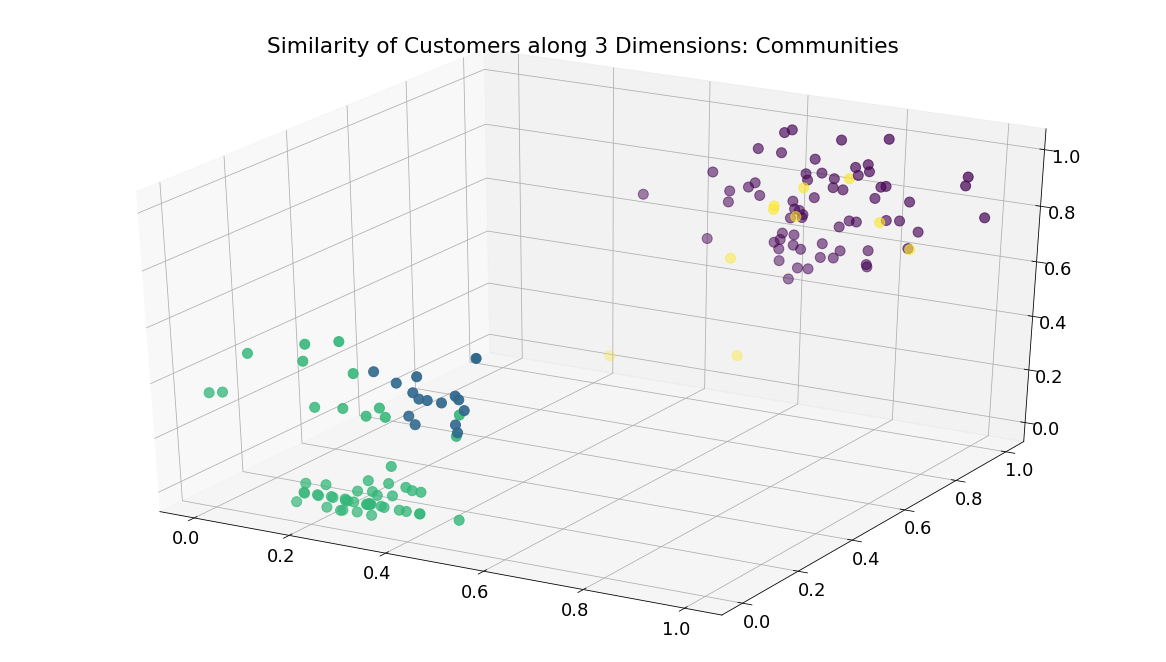

In [ ]:
# 1. Set-up 3D Plot
plt.rcParams['font.size'] = 18  # makes label size bigger
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
plt.title('Similarity of Customers along 3 Dimensions: Communities')

# 2. Plot Customers along re-scaled features
ax.scatter(X_scaled[:, 0], X_scaled[:, 5], X_scaled[:, 3], c=customers_df.Community, s=100)
plt.show()

# 7. Visualization of Relationships

In the previous plots we could only visualize at most 3 dimensions (i.e., features) at once. 
By collapsing features into similarities, we can visualize "overall" similarity of customers in a 2D Map!

**Run the code below to generate a map of Dr. D's Amazin' Grocery Store's Customers!**
#### *What do you observe?*


*Don't worry about the technical details of the visualization at this time. We will cover different methods more extensively in our next class!*


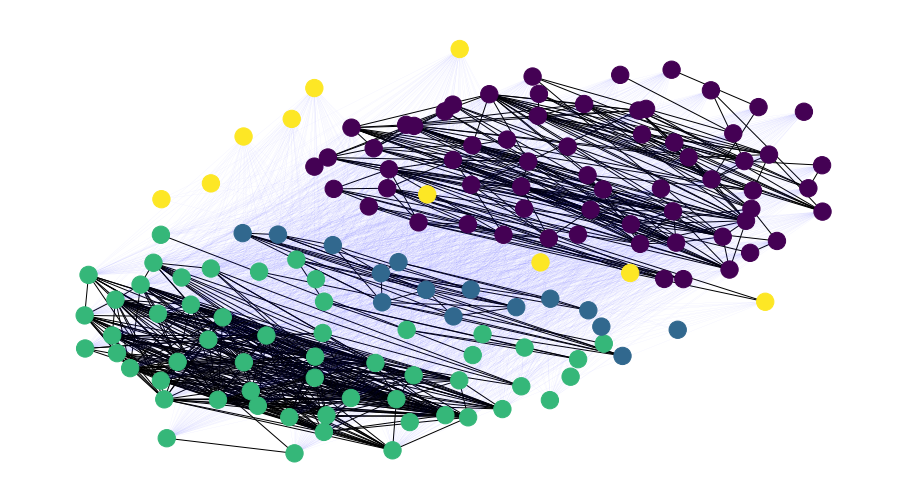

In [ ]:
# 0. Remove self-similarity for graphing
np.fill_diagonal(matrix, 0) 

# 1. Create a graph object from our similarity matrix
G = G=nx.from_numpy_array(matrix)

# 2. Differentiate between strong and weak relationships so that we can plot only the stronger ones
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.9]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.25]

# 3. Create a Customer Similarity Map where Colors indicate Segments and distance between nodes indicates Similarity
plt.figure()
plt.axis('off')
pos = nx.fruchterman_reingold_layout(G)

# 4. Visualize the Nodes = Customers in the Map
nx.draw_networkx_nodes(G, pos, node_color=[labels[node] for node in G])

# 5. Visualize the Similarities between Customers in the Map using Edges

# 5a. High Similarity
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=1)

# 5b. Low Similarity
nx.draw_networkx_edges(G, pos, edgelist=esmall, width=.05, alpha=0.5, edge_color='b', style='dashed')

# 6. Show plot
plt.show()

# **Looking Ahead:**  

**Next Class:** Thursday, February 2, 2023

#### ***Dimensionality Reduction***  


#### Reading before class:
Gabel, S., Guhl, D. and Klapper, D., 2019. P2V-MAP: mapping market structures for large retail assortments. Journal of Marketing Research, 56(4), pp.557-580.

    

This notebooks is inspired by the following great tutorials:

https://blog.easysol.net/machine-learning-algorithms-3/
https://mubaris.com/posts/kmeans-clustering/
https://www.kaggle.com/tonzowonzo/simple-k-means-clustering-on-the-iris-dataset  
https://towardsdatascience.com/graph-algorithms-part-2-dce0b2734a1d

